In [1]:
import pandas as pd

In [80]:
df=pd.read_excel('working dataset.xlsx')

In [81]:
df.head()

,S.no,Accel_X(f),Accel_y(f),Accel_z(f),Accel_X(ri),Accel_y(ri),Accel_z(ri),Accel_X(l),Accel_y(l),Accel_z(l),Gyro_x(f),Gyro_y(f),Gyro_z(f),Gyro_x(ri),Gyro_y(ri),Gyro_z(ri),Gyro_x(l),Gyro_y(l),Gyro_z(l),Force
0,1,-11899.689024,2216.658537,-3744.195122,13158.423077,8613.817308,5393.884615,-13045.510204,2214.020408,-5478.897959,-306.701220,-357.073171,-774.243902,-185.461538,292.634615,71.634615,528.979592,520.454082,-353.198980,768.0478
1,2,-13941.373494,2508.963855,-4122.240964,11340.184615,8450.717949,6058.051282,13941.672316,3471.977000,-3702.621469,-445.259036,286.897590,44.813253,-251.358974,33.774359,375.030769,128.033898,-71.983051,-65.372881,694.2300
2,3,-12547.962963,1361.234568,-6075.555556,9107.570621,10053.587571,4318.960452,-12859.951807,3837.469880,-4204.144578,-77.141975,586.154321,-224.500000,-161.090395,221.638418,281.627119,-173.349000,-162.753012,-377.138554,679.6300
3,4,-12665.590278,816.166667,-7267.944444,11358.660099,8585.256158,6005.714286,-13697.440000,3567.471264,-3454.574713,-266.388889,640.375000,150.437500,-229.142857,88.635468,327.413793,-581.212644,341.718391,-130.810345,622.5600
4,5,-13931.266272,1572.710059,-4480.828402,11712.122449,8967.841837,6396.653061,-15088.837209,3401.302326,238.139535,-374.976331,-0.449704,-418.846154,-305.484694,35.188776,280.321429,75.238372,113.616279,-109.709302,524.8200


In [87]:
df=df.iloc[:,1:]

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
from sklearn.model_selection import train_test_split

In [83]:
scaler=MinMaxScaler(feature_range=(0, 1))

In [84]:
X=scaler.fit_transform(df)

In [13]:
arr_mean=df.mean()

In [53]:
arr=df.values

In [41]:
import numpy as np

In [51]:
def set_y(arr,arr_mean):
    y=[]
    for i in range(0,39):
        count=0
        for j in range(0,19):
            if (arr[i][j] >= 0.8*arr_mean[j] and arr[i][j] <= 1.2*arr_mean[j]):
                count+=1
        if(count>=10):
            y[i].append(1)
        else:
            y[i].append(0)
    return y

In [50]:
set_y(arr,arr_mean)

IndexError: list index out of range

In [57]:
from sklearn.cluster import KMeans

In [61]:
kmeans=KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0)

In [62]:
y_kmeans=kmeans.fit_predict(X)

In [63]:
y_kmeans

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

In [65]:
import matplotlib.pyplot as plt

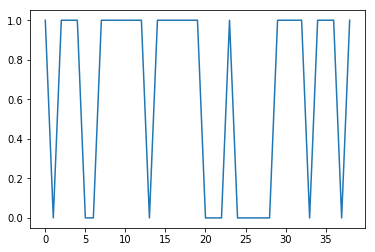

In [66]:
plt.plot(y_kmeans)

In [68]:
y=pd.DataFrame(y_kmeans)

In [76]:
y.columns=['y']

In [77]:
y.shape

(39, 1)

In [88]:
df2=df.add(y,fill_value=0)

In [89]:
df2.head()

,Accel_X(f),Accel_X(l),Accel_X(ri),Accel_y(f),Accel_y(l),Accel_y(ri),Accel_z(f),Accel_z(l),Accel_z(ri),Force,Gyro_x(f),Gyro_x(l),Gyro_x(ri),Gyro_y(f),Gyro_y(l),Gyro_y(ri),Gyro_z(f),Gyro_z(l),Gyro_z(ri),y
0,-11899.689024,-13045.510204,13158.423077,2216.658537,2214.020408,8613.817308,-3744.195122,-5478.897959,5393.884615,768.0478,-306.701220,528.979592,-185.461538,-357.073171,520.454082,292.634615,-774.243902,-353.198980,71.634615,1.0
1,-13941.373494,13941.672316,11340.184615,2508.963855,3471.977000,8450.717949,-4122.240964,-3702.621469,6058.051282,694.2300,-445.259036,128.033898,-251.358974,286.897590,-71.983051,33.774359,44.813253,-65.372881,375.030769,0.0
2,-12547.962963,-12859.951807,9107.570621,1361.234568,3837.469880,10053.587571,-6075.555556,-4204.144578,4318.960452,679.6300,-77.141975,-173.349000,-161.090395,586.154321,-162.753012,221.638418,-224.500000,-377.138554,281.627119,1.0
3,-12665.590278,-13697.440000,11358.660099,816.166667,3567.471264,8585.256158,-7267.944444,-3454.574713,6005.714286,622.5600,-266.388889,-581.212644,-229.142857,640.375000,341.718391,88.635468,150.437500,-130.810345,327.413793,1.0
4,-13931.266272,-15088.837209,11712.122449,1572.710059,3401.302326,8967.841837,-4480.828402,238.139535,6396.653061,524.8200,-374.976331,75.238372,-305.484694,-0.449704,113.616279,35.188776,-418.846154,-109.709302,280.321429,1.0


In [90]:
df2.to_csv('final.csv')

# Logistic Regression

In [92]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
MM=MinMaxScaler(feature_range=(0,1))

In [94]:
arr=df2.values

In [95]:
X=arr[:,:19]

In [96]:
y=arr[:,-1]

In [97]:
X=MM.fit_transform(X)

In [98]:
from sklearn.model_selection import train_test_split

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [101]:
from sklearn.linear_model import LogisticRegression

In [109]:
logreg=LogisticRegression()

In [110]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [111]:
y_pred=logreg.predict(X_test)

In [112]:
from sklearn.metrics.classification import accuracy_score

In [113]:
accuracy_score(y_test,y_pred)

0.875

# KNN

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [114]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [115]:
y_pred=knn.predict(X_test)

In [116]:
accuracy_score(y_test,y_pred)

0.875

# SVM

In [117]:
from sklearn.svm import SVC

In [118]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [119]:
y_pred = classifier.predict(X_test)

In [120]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [122]:
accuracy_score(y_test,y_pred)

0.75